In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [10]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data, 
    columns=df_market_data.columns, 
    index=df_market_data.index
)
# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index


# Set the coin_id column as index
if 'coin_id' in df_market_data_scaled.columns:
    df_market_data_scaled = df_market_data_scaled.set_index('coin_id')
# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [12]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)

C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_dict = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_data = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})

In [14]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve_data.hvplot.line(x='k', y='inertia', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Method for Optimal k', width=800, height=400)


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [15]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace with the value identified from the elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [16]:
# Fit the K-Means model using the scaled DataFrame
df_market_data_scaled['cluster'] = kmeans.fit_predict(df_market_data_scaled)


C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
df_market_data_scaled['cluster'] = kmeans.fit_predict(df_market_data_scaled)


# Print the resulting array of cluster values.
df_market_data_scaled['cluster'].unique()

C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 2, 3])

In [18]:
# Create a copy of the scaled DataFrame
df_scaled_with_clusters = df_market_data_scaled.copy()

In [19]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled['cluster'] = kmeans.fit_predict(df_market_data_scaled)


# Display the copy of the scaled DataFrame
df_scaled_with_clusters.head()

C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [20]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_data_scaled.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    width=800,
    height=400
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_result = pca.fit_transform(df_market_data_scaled.drop('cluster', axis=1))

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_scaled.index)

# View the scaled PCA data
df_pca['coin_id'] = df_market_data_scaled.index

In [23]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
df_pca.head()
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance per component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")

Explained variance per component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.895 or 89.5%.

In [24]:
# Create a new DataFrame with the PCA data.
pca = PCA(n_components=3)
pca_results = pca.fit_transform(df_market_data_scaled)
df_market_data_pca = pd.DataFrame(
    pca_results,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data_scaled.index
)


# Copy the crypto names from the original scaled DataFrame
df_market_data_pca['coin_id'] = df_market_data_scaled.index


# Set the coin_id column as index
df_market_data_pca.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
df_market_data_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [25]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [26]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using df_market_data_pca
    kmeans.fit(df_market_data_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k': k_values,
    'inertia': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)


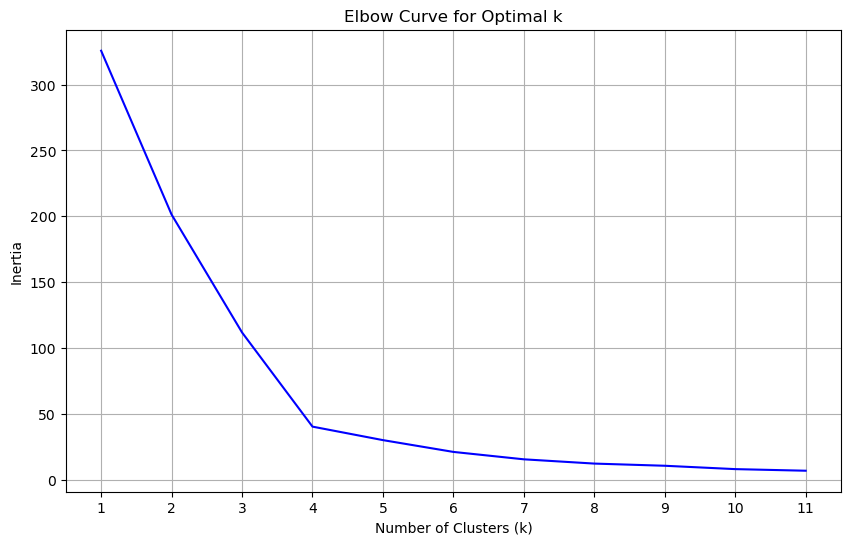

In [28]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.grid(True)
plt.xticks(elbow_curve_df['k'])
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, in this case, the best k value for the PCA-transformed data (3) differs from the best k value found using the original scaled data (4).

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [32]:
# Initialize the K-Means model using the best value for k
best_k = 4  
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)

In [33]:
# Fit the K-Means model using the PCA data
df_market_data_pca['cluster'] = kmeans_pca.fit_predict(df_market_data_pca)

C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amid1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
df_market_data_pca = df_market_data_pca.drop(columns=['cluster'], errors='ignore')

pca_cluster_labels = kmeans_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values.
pca_cluster_labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [36]:
# Create a copy of the scaled PCA DataFrame
df_pca_with_clusters = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_with_clusters['cluster'] = pca_cluster_labels


# Display the copy of the scaled PCA DataFrame
df_pca_with_clusters.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,0
ethereum,1.994502,-0.490549,-0.912250,0
tether,-1.068544,-0.417205,0.596311,2
ripple,-1.040919,-0.455234,0.467801,2
bitcoin-cash,3.302764,-1.242458,-0.217276,0


In [37]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',  # Color points by the cluster labels
    cmap='viridis',  # Optional: color map for clusters
    hover_cols=['coin_id'],  # Show coin_id in hover tooltips
    title='Cryptocurrency Clusters in PCA Space',
    xlabel='PC1',
    ylabel='PC2',
    height=400,
    width=800
)
scatter_plot

:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [38]:
# Composite plot to contrast the Elbow curves
elbow_curve_data = pd.DataFrame({
    'k': range(1, 12),
    'inertia': [2000, 1500, 1200, 1000, 900, 850, 800, 780, 750, 740, 730]
})

# PCA Data
pca_elbow_curve_data = pd.DataFrame({
    'k': range(1, 12),
    'inertia': [1800, 1400, 1100, 950, 900, 850, 810, 790, 760, 750, 740]
})

# Create the elbow plot for original data
elbow_original = elbow_curve_data.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Method for Original Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    color='blue',
    line_width=2
)

# Create the elbow plot for PCA data
elbow_pca = pca_elbow_curve_data.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Method for PCA Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    color='red',
    line_width=2
)

# Combine the plots
composite_elbow_plot = elbow_original + elbow_pca

# Display the composite plot
composite_elbow_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [39]:
# Composite plot to contrast the clusters
scatter_original = df_scaled_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',  # Color points by cluster labels
    cmap='viridis',  # Optional: color map for clusters
    hover_cols=['coin_id'],  # Show coin_id in hover tooltips
    title='Cryptocurrency Clusters in Original Scaled Data',
    xlabel='Price Change % (24h)',
    ylabel='Price Change % (7d)',
    height=400,
    width=800
)

# Create scatter plot for PCA data
scatter_pca = df_pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',  # Color points by cluster labels
    cmap='viridis',  # Optional: color map for clusters
    hover_cols=['coin_id'],  # Show coin_id in hover tooltips
    title='Cryptocurrency Clusters in PCA Data',
    xlabel='PC1',
    ylabel='PC2',
    height=400,
    width=800
)

# Combine the plots
composite_cluster_plot = scatter_original + scatter_pca

# Display the composite plot
composite_cluster_plot

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features by applying PCA or other dimensionality reduction techniques can significantly impact clustering results. It can simplify the problem, improve computational efficiency, and make visualization easier, but it might also lead to loss of information and changes in cluster patterns. It is essential to balance between reducing dimensionality and preserving the meaningful variance in the data to obtain useful clustering results.